In [47]:
import matplotlib.pyplot as plt
from datetime import date
from bs4 import BeautifulSoup
import requests

In [126]:
#scraping data:
url = "https://www.leagueofgraphs.com/rankings/rank-distribution/euw"  # Replace with the URL of the website you want to scrape
headers = {'User-Agent': 'Mozilla/5.0'}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

data = soup.find(class_="data_table summoners_distribution_table").find_all("tr")
extracted_values = []

for row in data[1:]:
    rank_name = row.find("td").find("img")["alt"]
    rank_value = row.find("i").get_text()[:-1]
    extracted_values.append((rank_name, rank_value))
    
#final values:
ranks, rank_dist = zip(*extracted_values)

#combine values:
ranks_combined = ["Iron", "Bronze", "Silver", "Gold", "Platinum", "Emerald", "Diamond", "Apex"]
ranks_dist_combined = [0 for i in ranks_combined]

for rank_name_combined in ranks_combined:
    for rank_name in ranks:
        if rank_name_combined in rank_name:
            #print(f"{rank_name_combined} {rank_name} {rank_dist[ranks.index(rank_name)]}")
            ranks_dist_combined[ranks_combined.index(rank_name_combined)] += float(rank_dist[ranks.index(rank_name)])
        if rank_name_combined == "Apex" and rank_name in ["Challenger", "GrandMaster", "Master"]:
            #print(f"{rank_name_combined} {rank_name} {rank_dist[ranks.index(rank_name)]}")
            ranks_dist_combined[-1] += float(rank_dist[ranks.index(rank_name)])

ranks, rank_dist = ranks_combined, ranks_dist_combined

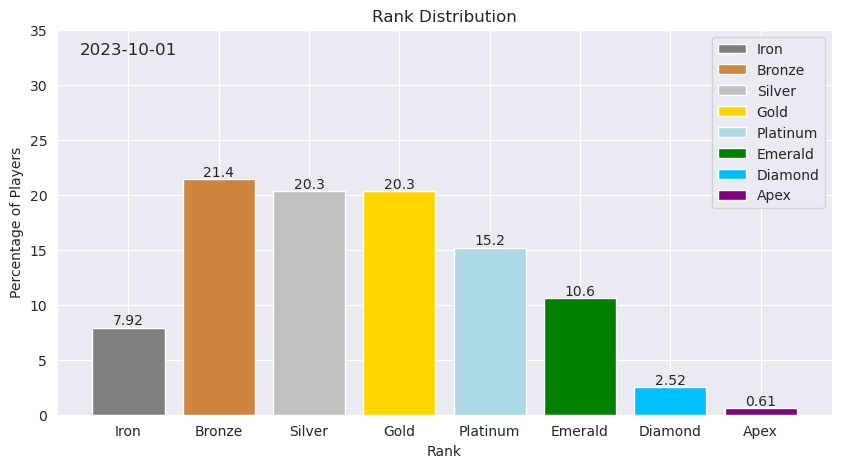

In [132]:
#figsize and colors:
plt.figure(figsize=(10, 5))

#colors based on rank name:
colors = ['gray', 'peru', 'silver', 'gold', 'lightblue', 'green', 'deepskyblue', 'purple']

#plotting:
bars = plt.bar(ranks, rank_dist, color=colors)

#adding text to bars:
for bar, value in zip(bars, rank_dist):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(value, 3), ha='center', va='bottom')

#adding date:
plt.text(0, 32.5, f"{date.today()}", fontsize=12, ha='center', va='bottom')

#plot settings:
plt.title("Rank Distribution")
plt.xlabel("Rank")
plt.ylabel("Percentage of Players")
plt.ylim(0, 35)
plt.legend(bars, ranks)